In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)


In this notebook we build a model dedicated to the pneumatic transport of small particles. We consider the pneumatic
conveyance of torrefied biomass.

##################################################################################################

I Governing parameters

##################################################################################################

We estimate the Reynolds number of torredied wood particle of averaged diameter $d = 50\mu m$ and density $\rho _p = 1400$ kg.m $^{-3}$. The diameter of the pipe is approximatively $5$ cm and the superficial gas flow velocity at the inlet is $V_f \geq 3 m/s$. The mass solid flow rate is between 1.5 t/h $ \leq \dot{m}_p \leq $ 7 t/h.





In [2]:
#pipe
R = 54.5e-3
L = 155.3
S = np.pi*R**2

#particles
d = 46e-6
rhop = 1480
rhof = 1.17 #be careful the gas is compressible
g = 9.81
mu = 2e-5
uStokes = 2/9*(rhop-rhof)*g*d**2/4/mu
Vf = 5
print("Terminal velocity",uStokes)
Re = rhof*uStokes*d/mu
print("Particulate Reynolds number in sedimentation",Re)

RePipe = rhof*Vf*R/mu
print("Pipe Reynolds number",RePipe)

mp = 2000/3600
Vp = mp/rhop/S
print("Mean solid flow rate (per unit of area)",Vp)


Terminal velocity 0.08527081663000001
Particulate Reynolds number in sedimentation 0.22946376755133
Pipe Reynolds number 15941.249999999996
Mean solid flow rate (per unit of area) 0.04022748691589376


The particle Reynolds number is below one, and as a results we consider the particles to be in the Stokes regime. 
Be careful : for larger particle size this assumption is most probably incorrect ! 

<!-- Wrong : Moreover the Pipe Reynolds number si below $2000$ thus we consider that the flow within the fluid phase is laminar (we may skip to a turbulent model if needed) -->

The pipe Reynolds number is much larger than the critical Reynolds number -> turbulent flow

<!-- A rough estimate of the flowrate $Q_f$ can already be obtained $Q_f = \pi R^2V_f$ where $V_f$ is the average gas velocity along the pipe.
Taking for now $V_f \propto v_t$, we get  $Q_f$ -> comparer les Delta P celles du es aux rabsport vs celles dues à la perte de charges -->


The loads is : $\dot{m}_s/\dot{m_f}\geq 10$ -> the interactions between solid particles and wall dominated over the solid -fluid interaction (although it remains to compute the solid volume fraction).

<!--Wrong:
\begin{equation}
\frac{\dot{m}_s}{\dot{m_f}} = \frac{\rho _p}{\rho _f} \frac{V_p}{V_f} = \frac{\rho _p}{\rho _f} \frac{V_p}{u_f} \frac{1}{1- \phi} = \frac{\rho _p}{\rho _f} \frac{u_p}{u_f} \frac{\phi}{1- \phi}
\end{equation}

the ratio of Vp over Vf can be computed based on the simple momentum balance. For a given flow rate of particle we will get the volume fraction.
Or 
\begin{equation}
 1- \frac{\rho _p}{\rho _f} \frac{V_p}{u_f} \frac{\dot{m}_f}{\dot{m_s}} =  \phi
 \end{equation}-->






##################################################################################################

II Governing equations: homogenous flow within the pipe (no influence of the wall)

##################################################################################################

We consider the two phase flows equations for both the fluid and solid phases (see Jackson book) assuming for now that the flow within the pipe is homogeneous (i.e. independent of the radial coordinate)


\begin{align}
0 &=  - \epsilon \frac{\partial  p_f }{\partial z} -nf_p-\epsilon \rho _f g \nonumber \\
0 &= -(1-\epsilon) \frac{\partial  p_f }{\partial z}  - (1-\epsilon) \rho _p g + nf_p. \nonumber
\end{align}

Since we consider Stokes particles we may write $ nf_p = \beta(\phi)(u_f-u_p) $. Typically for very low volume fraction we recover Stokes law $nf_p =\frac{9}{2} \frac{\mu _f \phi}{a^2} (u_f-u_p)$ where $a$ is the particle radius. For denser flow regime we can use the correlation based on Richardson-Zaki experiments (see Jackson book p 49) $nf_p = \beta(\phi)(u_f-u_p)$ where,

\begin{equation}
\beta(\phi) = \frac{(\rho _p - \rho _f)\phi g}{v_t(1-\phi)^{n-2}}
\end{equation}
where $v_t$ is the terminal velocity for an isolated particle and $n\approx 4.65$ within the Stokes regime.
Since the gas is much less dense than the particle phase we have

\begin{align}
0 &=  - \epsilon \frac{\partial  p_f }{\partial z} -\beta(\phi)(u_f-u_p) \nonumber \\
0 &= -\phi \frac{\partial  p_f }{\partial z}  - \phi \rho _p g + \beta(\phi)(u_f-u_p). \nonumber
\end{align}


Summing both equations we get,
\begin{equation}
\frac{\partial  p_f }{\partial z} = - \phi \rho _p g.
\end{equation}

Hence in the homogeneous regime, the pressure gradient and the particle volume fraction are directly related. From this last equation we can see that the scaling for the pressure gradient is the weight of the particles such that

\begin{equation}
\frac{\partial  p_f^*}{\partial z^*} = - \phi
\end{equation}
where $\frac{\partial  p_f }{\partial z}=\rho _p g\frac{\partial  p_f^*}{\partial z^*}$.
Inserting this formula in the fluid phase averaged equation and denoting $u _p = V_p/\phi$, $u _f = V_f/(1-\phi)$ we get the following relation between the fluid and particle flow rate (per unit of sectional area)
\begin{equation}
\frac{V_f}{v_t(1-\phi)} - \frac{V_p}{v_t\phi} =(1-\phi)^{n-1}
\end{equation}

From the last two equations we got a direct relation between the gradient of pressure and the flow rate. Using the terminal velocity to normalize the flow rate we get
\begin{equation}
\frac{V_f ^* }{1-\phi} - \frac{V_p^*}{\phi} =(1-\phi)^{n-1}
\end{equation}




<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_41453/2679080489.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$-\\frac{\partial  p_f^*}{\partial z^*}=\phi$', fontsize=20)


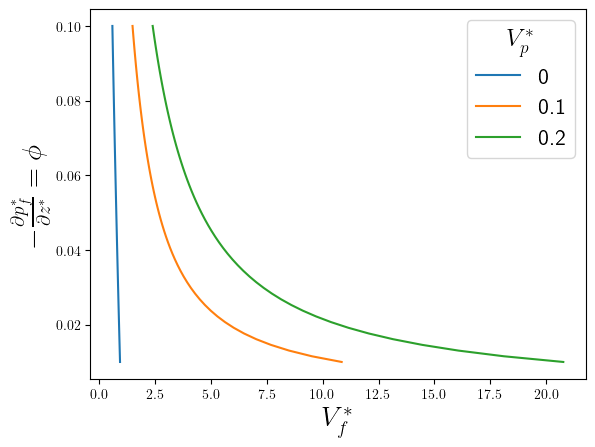

In [3]:
phi = np.linspace(0.01,0.1,num=60)
Vp=[0,0.1,0.2]
n=4.65

for i in range(0, len(Vp)):
  Vf = Vp[i]/phi*(1-phi)+(1-phi)**n
  plt.xlabel('$V_f^*$', fontsize=20)
  plt.ylabel('$-\\frac{\partial  p_f^*}{\partial z^*}=\phi$', fontsize=20)
  plt.plot(Vf,phi)
plt.legend(Vp,title="$V_p^*$",fontsize=16,title_fontsize=18)


As demonstrated in the figure above this simple modeld does not reproduce the observed behaviour (not the good trend with the increase of volume fraction).


##################################################################################################

III Governing equations: hetereogeneous flow within the pipe (influence of Wall Shear Stress)

##################################################################################################


We consider now the two phase flows equations for both the fluid and solid phases (see Jackson book again) assuming that the flow in the pipe is inhomogeneous (dependent on the radial coordinate). However this requires solving a set of coupled non-linear equations. We consider a simpler approach which is based on the assumption that the radial distance overwhich the boundary effects are important is very small with respect to the pipe radius. Then we average the equation of motion over the whole pipe section and we get the equation of motion including the shear stress at the wall (since by the divergence theorem $\int _S \nabla_s \cdot ... dS = \int _C ... \cdot \bm n dC$ - and the correlation between all the product of "fluctuating" quantities are zero except near the wall). The equations of motion reads,


\begin{align}
0 &=  - \epsilon \frac{\partial  p_f }{\partial z} + \epsilon\frac{2}{R}\Sigma_{f }^{rz}|_{wall} -\beta(\phi)(\frac{V_f}{1-\phi}-\frac{V_p}{\phi}) \nonumber \\
0 &= -\phi \frac{\partial  p_f }{\partial z} + \frac{2}{R}\Sigma_{p }^{rz}|_{wall}  - \phi \rho _p g + \beta(\phi)(\frac{V_f}{1-\phi}-\frac{V_p}{\phi}). \nonumber
\end{align}

This model requires an expression both for the fluid shear stress at the wall ($\Sigma_{f }^{rz}|_{wall}$) and the solid shear stress at the wall ($\Sigma_{p }^{rz}|_{wall}$). 

##################################################################################################

III.1 Influence of the fluid friction at the wall

##################################################################################################

In the dilute regime we also now that the turbulent friction at the wall will be (if we assume that the flow close to the wall is laminar, then $\Sigma_{f }^{rz}|_{wall} \propto \mu_f V_f/R$ (note that for a single phase flow in the laminar regime we have $- \frac{\partial  p_f }{\partial z} = 8 \mu_f V_f/R^2$).),
<!--
\begin{equation}
\frac{\partial  p_f}{\partial z} = \epsilon C(Re)\rho _f u_f^2 / R
\end{equation}
-->

\begin{equation}
\Sigma_{f}^{rz}|_{wall} =  -C(Re) \rho _f V_f^2
\end{equation}

In the high Reynolds number regime the function $C$ depends weakly on the Reynolds number. We take for $C = cste$ which will be fitted to the experiments. We get

\begin{equation}
\frac{\partial  p_f }{\partial z} = - \phi \rho _p g - C\epsilon\frac{2}{R}\rho _f V_f^2.
\end{equation}

which gives,
\begin{equation}
\frac{\partial  p_f ^*}{\partial z ^*} = - \phi - 2C(1-\phi)\frac{\rho _f V_f^2}{R\rho _p g}
\end{equation}
In the limit $\phi \ll 1$ for which this expression is valid we get,
\begin{equation}
\frac{\partial  p_f ^*}{\partial z ^*} = - \phi - 2C\frac{\rho _f V_f^2}{R\rho _p g}
\end{equation}

From this last equation we wee that $\phi$ is not directly given by $\frac{\partial  p_f ^*}{\partial z ^*}$, which leads to a more complex relation in the fluid phase momentume equation. TO DO : solve it using fixed point solver.


##################################################################################################

III.2 Influence of the solid friction at the wall

##################################################################################################

For the solid shear stress at the wall we use the boundary conditions developped by Simonin and co-workers,
$\Sigma_{p }^{rz}|_{wall} = \mu _p p_p$ where $\mu_p$ is the frictional viscosity (Coulomb dynamic coefficient of friction $0.1 \leq \mu_p \leq 1$) and $p_p$ the granular pressure. The granular pressure may have very different physical origins (kinetic, collisional, frictional).  As $p_p$ is a complex function we assume $p_p = A\rho _p \phi u_p^2$ where $A$ is a constant to be fitted on the experiments. 

##################################################################################################

TO DO list 

##################################################################################################

* compare with the experimental results of Rautiainen et al. (1999).
* explore the influence of the dimensionless parameters
* change the drag law and consider its influence 



